# E2 — Exercises on Physical Chemistry

This notebook contains interactive exercises related to the L2 session of the SSCP2018. 

Link to the accompanying notebook
* [L2 — Overview of Physical Chemistry and Electrochemistry](L2 - Overview of Physical Chemistry and Electrochemistry.ipynb)


The following topics are covered
* [Modelling a reaction with the Law of Mass Action](#mass_action)
* [Exercise 1: Modelling a Two-way Reaction to Understand Equilibrium](#equilibrium)
* [Exercise 2: Modelling Michelis-Menten Kinetics](#kinetics)

<a id="mass_action"></a>
## Modelling a reaction with the Law of Mass Action

Now we will turn to how we can solve the ODE system given by the Law of Mass Action to describe the reaction over time. We will sove the equation system numerically using the function [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), which is a wrapper of a well developed FORTRAN ode solver. If you normally use another programming language, such as Matlab, similar functions are available there. If you have never solved ODE systems numerically, and you want to understand the process in detail, we recommend the (short) book *Finite Difference Computing with Exponential Decay Models* by Professor Hans Petter Langtangen, which is open access and can be [downloaded free of charge from Springer.](http://www.springer.com/us/book/9783319294384) This books gives a thorough and detailed introduction to solving ODE systemts numerically, and even has a subchapter on modelling chemical reactions, i.e., the exact same problems we will be solving here.


If you want to know how to solve such systems numerically from scratch, take a look at the notebook: [S2—Solving ODE Systems Numerically](S2 - Solving ODE Systems Numerically.ipynb).

The scipy `odeint` function solves an explicitly defined system on the form
$$\frac{{\rm d}y}{{\rm d}t} = f(y, t, p).$$
Here, $y$ is a single variable if you have a single ODE, or a vector if you have a system of ODEs. It is often referred to as the *state* variables or simply *states* of the system. The variable $t$ denotes time, and the variable $p$ denotes a vector of any additional parameters of your system. The function $f$ is often called the right-hand-side (RHS) of the system.

Our ODE system was given by the Law og Mass Action
$$\begin{align}
\frac{\mathrm{d [H_2 O]}}{\mathrm{d}t} = k\mathrm{[H_2]^2}\mathrm{[O_2]}, \qquad 
\frac{\mathrm{d [O_2]}}{\mathrm{d}t} = -\frac{\mathrm{d [H_2 O]}}{\mathrm{d}t}, \qquad
\frac{\mathrm{d [H_2]}}{\mathrm{d}t} = -2\frac{\mathrm{d [H_2 O]}}{\mathrm{d}t}.
\end{align}
$$
To write this on the form needed by `odeint` we express the states as the vector $y = (\mathrm{[H_2]}, \mathrm{[O_2]}, \mathrm{[H_2O]})$, which means the RHS becomes:
$$f(y, t, p) = \bigg(\frac{\mathrm{d [H_2]}}{\mathrm{d}t}, \frac{\mathrm{d [O_2]}}{\mathrm{d}t}, \frac{\mathrm{d [H_2 O]}}{\mathrm{d}t}\bigg).$$

We now implement the RHS

In [2]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [3]:
# Implement the right-hand-side of the system

def rhs(y, t, k):
    H2, O2, H2O = y

    dH2_dt = -2*k*H2*H2*O2
    dO2_dt = -k*H2*H2*O2
    dH2O_dt = k*H2*H2*O2
    
    return [dH2_dt, dO2_dt, dH2O_dt]


In addition to defining the ODE system itself, we need to supply information about what times to solve the equations for, as well as the inital conditions. This is supplied directly to the `odeint` function, which has the signature: ``odeint(rhs, y_0, t, p)``. Here `rhs` is a function and `y_0`, `t`, and `p` are vectors.

In [6]:
# Make a vector of time points where solutions are to be computed
dt = 0.1
T = 10
time = np.arange(0, T, dt)

# Define the initial condition
y_0 = (1.0, 1.0, 0.0)

# Define any extra parameters of the ODE system
k = 10
params = (k,) # p must be a vector

# Call the ODE solver
solutions = odeint(rhs, y_0, time, params)
H2, O2, H2O = np.hsplit(solutions, 3)

We have now computed the solutions of the ODE system for the times $t\in[0, 10]$ with a time step of $\Delta t = 0.1$. The result from the `odeint` function call is a 2D array with each state variable as a column. We therefore use the function `np.hsplit` to split into three 1D arrays, to make it easier to plot and analyze it.

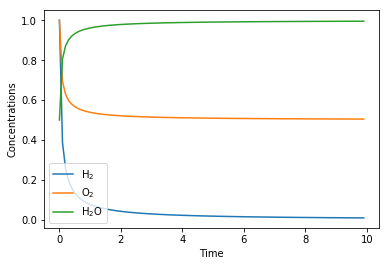

In [7]:
# Plot data with labels
plt.plot(time, H2, label=r'H$_2$')
plt.plot(time, O2, label=r'O$_2$')
plt.plot(time, H2O, label=r'H$_2$O')

# Prettify plot
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()

plt.show()

From our resulting plot we can now see how the reaction occurs very swiftly during the first second, but then subsides as the reactants start to run out. As we set our initial conditions to equal concentrations of O$_2$ and H$_2$, we see that H$_2$ becomes the limiting factor of the reaction as it is consumed at twice the rate of the oxygen.

If we now want to explore our system, we would most likely want to change the time domain, the initial conditions or the parameters of the system. You can go back and change these manually and then rerun and replot the system. If you plan to do it many times, it might be more systematic to define a function that does everything, for simplicity and order.

### The Jupyter Notebook Widget

If you define a function that both solves and plots an ODE system you can also use a nice functionality in Jupyter *interact widgets* to study the system a little more interactively. See our example below where you can use the sliders to change the rate of the reaction $k$ or the inital conditions. Every time you drag one of the sliders, the system is resolved and replotted using the new values. 

(How such widgets are made are out of scope for this summer school, but if you are curious you can take a look at the file `L2_widgets.py` for an example or the [online Jupyter documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html). It's not that tricky, but some prior knowledge with Python is probably useful.)

In [1]:
from L2_widgets import ReactionWidget
ReactionWidget().display()

interactive(children=(FloatSlider(value=1.0, description='k', max=5.0), FloatSlider(value=3.0, description='H2_0', max=5.0), FloatSlider(value=3.0, description='O2_0', max=5.0), Output()), _dom_classes=('widget-interact',))

<a id="equilibrium"></a>
## Exercise 1: Modelling a Two-way Reaction to Understand Equilibrium

Not it's time for you to try. Using the same approach as for the one-way reaction above, model the two-way reaction

**Exercise 1a)**

We will be modeling the following binding reaction
$$\mathrm{Mb} + \mathrm{O_2} \underset{k_-}{\overset{k_+}{\rightleftharpoons}} \mathrm{MbO_2}.$$
Using the law of mass action, write out the corresponding ODE-system.

**Exercise 1b)**

Define the RHS of the ODE-system.

In [2]:
# your code here

**Exercise 1c)**

Use `odeint` to solve the system. Make up some reasonable parameters.

Plot your solution.



In [3]:
# your code here

**Exercise 1d)**

Compute the equilibrium by hand and verify that it matches your numerical solution. 

If you double $k_{+}$, what should happen to the equilibrium? Test your assumption by recomputing with changed parameters.

<a id='kinetics'></a>
## Exercise 2: Modeling Michaelis-Menten Kinetics

Let us model the Michaelis-Menten reaction and analyse the behavior
$${\rm S} + {\rm E} \underset{k_{-1}}{\overset{k_1}{\rightleftharpoons}} {\rm ES} \overset{k_2}{\rightarrow} {\rm E} + {\rm P}.$$

**Exercise 2a)**

Using the law of mass action, write out the system of ODEs that describe the four concentrations $[{\rm S}]$, $[{\rm E}]$, $[{\rm ES}]$, $[{\rm P}]$.

**Exercise 2b)**

Implement the RHS of the system.

* *Hint:* Remember that the signature must be `def rhs(y, t)`, where `y` is a vector of the four states. The function must return a list of the derivatives of the four states in the same order as `y`.






In [ ]:
# your code here

**Exercise 2c)**

Solve the system with the rates $k_-1 = 1$, $k_1 = 2$, $k_2 = 3$. Let $[{\rm S}]_0 = 1$ and $[{\rm E}]_0 = 0.1$. Solve the system for $t\in[0, 30]$.

In [4]:
# your code here

**Exercise 2d)**

Make two plots, in the plot the curves for the substrate and product, in the second plot the curves of bound and free enzyme.

* *Hint:* Your solutions will be a large 2D-matrix. To split them into seperate curves use `S, E, SE, P = np.hsplit(y, 4)`.


**Exercise 2e)**

As a verifictation, let us make sure our solution is mass conserving. We know that the total amount of enzyme $[\rm E] + [\rm ES]$ and the total amount of substrate and product $\rm [S] + [P]$ must both be constant. Plot these curves and ensure that they are constant.

The Michaelis-Menten gives the reaction velocity of the enzyme activity as
$$v = v_{\rm max} \frac{[S]}{K_m + [S]}, \qquad v_{\rm max} = k_2 [E]_{\rm tot}, \qquad K_m = \frac{k_{-1} + k_2}{k_1}.$$

Compare your solution to the Michaelis-Menten equation. Are the two different? Explain any differences you see.

* *Hint 1:* Remember that the reaction velocity by definition is $[\dot{\rm P}] = k_2[{\rm ES}]$.
* *Hint 2:* We made an assumption deriving the Michaelis-Menten equation. What was it? Are we making the same assumption when we are solving the system numerically?